In [1]:
import torch
from torch import nn
from torchvision.io import read_image
from torchvision import transforms
from generator import Generator
from pathlib import  Path
import matplotlib.pyplot as plt

In [2]:
input_transform = transforms.Compose([
    transforms.Grayscale()
])

img = read_image('Results/Train 3/input.jpg')
img = input_transform(img).unsqueeze(dim=0)
img = img/255
img.shape

torch.Size([1, 1, 256, 256])

In [3]:
generator = Generator(in_channels=1, out_channels=3)

GENERATOR_SAVE_PATH = 'Models/abacus_generator.pth'

model_file = Path(GENERATOR_SAVE_PATH)
if model_file.is_file():
    generator.load_state_dict(torch.load(f=GENERATOR_SAVE_PATH))
    print("A generator aleady exists... Loading that model...")
else:
    print("A generator does not exist in the specified path...")

A generator aleady exists... Loading that model...


In [4]:
generator.eval()
with torch.inference_mode():
    output = generator(img)
    output = (output + 1)/2

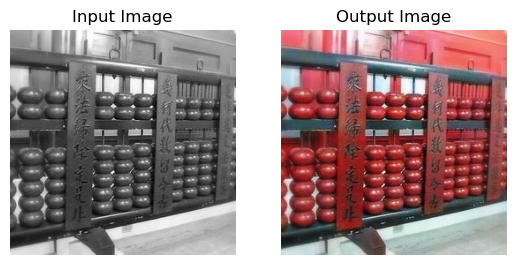

In [5]:
plt.subplot(1,2,1)
plt.imshow(img.squeeze(dim=0).permute(1,2,0), cmap='gray')
plt.title('Input Image')
plt.axis(False);

plt.subplot(1,2,2)
plt.imshow(output.squeeze(dim=0).permute(1,2,0))
plt.title('Output Image')
plt.axis(False);